In [1]:
%matplotlib inline

In [2]:
import ia_kernels

### Generate 3d vectors with directions correlated with $e_{\rm halo}$

In [3]:
npts = int(1e5)

e_halo = ia_kernels.normalized_vectors(np.random.random((npts, 3)))

p1 = np.zeros(npts) + 5.
correlated_e1_p1 = ia_kernels.axes_correlated_with_input_vector(e_halo, powerlaw_indices=p1, seed=43)

p2 = np.ones(npts)
correlated_e1_p2 = ia_kernels.axes_correlated_with_input_vector(e_halo, powerlaw_indices=p2, seed=43)

p3 = np.zeros(npts) - 5.
correlated_e1_p3 = ia_kernels.axes_correlated_with_input_vector(e_halo, powerlaw_indices=p3, seed=43)


### Compute angles between vectors and plot

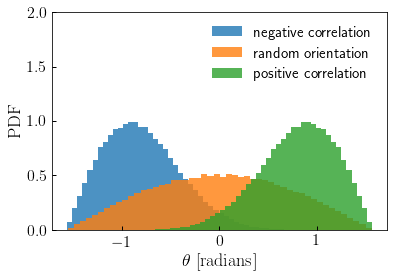

In [4]:
angles1 = ia_kernels.angles_between_list_of_vectors(e_halo, correlated_e1_p1)
angles2 = ia_kernels.angles_between_list_of_vectors(e_halo, correlated_e1_p2)
angles3 = ia_kernels.angles_between_list_of_vectors(e_halo, correlated_e1_p3)

fig, ax = plt.subplots(1, 1)

__=ax.hist(angles1-np.pi/2., bins=50, normed=True, alpha=0.8, label='negative correlation')
__=ax.hist(angles2-np.pi/2., bins=50, normed=True, alpha=0.8, label='random orientation')
__=ax.hist(angles3-np.pi/2., bins=50, normed=True, alpha=0.8, label='positive correlation')

legend = ax.legend()
ylim = ax.set_ylim(0, 2)
xlabel = ax.set_xlabel(r'$\theta \ [{\rm radians}]$')
ylabel = ax.set_ylabel(r'${\rm PDF}$')

### Generate a toy orthonormal basis for the galaxy shape

In [5]:
galaxy_e1 = ia_kernels.normalized_vectors(np.random.random((npts, 3)))

galaxy_e2 = ia_kernels.random_perpendicular_directions(galaxy_e1, seed=43)

galaxy_e3 = ia_kernels.vectors_normal_to_planes(galaxy_e1, galaxy_e2)

galaxy_orthonormal_basis = np.vstack((galaxy_e1, galaxy_e2, galaxy_e3)).T

### Rotate orthonormal bases to align $e_1$ with orientation angle

For each of the three cases above, $p_1, p_2, p_3,$ determine the rotation matrix that maps $e_{1}^{\rm galaxy}$ into $e_{1}^{\rm correlated}.$ Then apply these matrices to each of the three unit-vectors defining the above galaxy shape basis, so that the orthonormal basis of the galaxies has been rotated to be correlated with $e_{\rm halo}.$

In [6]:
matrices_p1 = ia_kernels.rotation_matrices_from_vectors(galaxy_e1, correlated_e1_p1)
re_oriented_random_e1_p1 = ia_kernels.rotate_vector_collection(matrices_p1, galaxy_e1)
re_oriented_random_e2_p1 = ia_kernels.rotate_vector_collection(matrices_p1, galaxy_e2)
re_oriented_random_e3_p1 = ia_kernels.rotate_vector_collection(matrices_p1, galaxy_e3)

In [7]:
matrices_p2 = ia_kernels.rotation_matrices_from_vectors(galaxy_e1, correlated_e1_p2)
re_oriented_random_e1_p2 = ia_kernels.rotate_vector_collection(matrices_p2, galaxy_e1)
re_oriented_random_e2_p2 = ia_kernels.rotate_vector_collection(matrices_p2, galaxy_e2)
re_oriented_random_e3_p2 = ia_kernels.rotate_vector_collection(matrices_p2, galaxy_e3)

In [8]:
matrices_p3 = ia_kernels.rotation_matrices_from_vectors(galaxy_e1, correlated_e1_p3)
re_oriented_random_e1_p3 = ia_kernels.rotate_vector_collection(matrices_p3, galaxy_e1)
re_oriented_random_e2_p3 = ia_kernels.rotate_vector_collection(matrices_p3, galaxy_e2)
re_oriented_random_e3_p3 = ia_kernels.rotate_vector_collection(matrices_p3, galaxy_e3)